**Question 1**
NOTE - Code should be run sequentially from the start to avoid losing variables

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from numpy.linalg import inv


Generate cubic polynomial data
\begin{equation}
f(x) = w_1x + w_2x^2 + w_3x^3 = b
\end{equation}

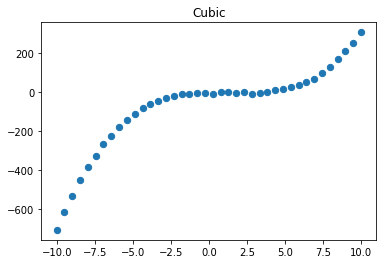

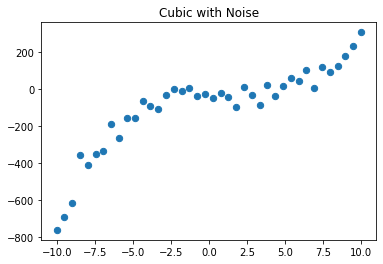

In [2]:
#Generating random data
np.random.seed(0)
x = np.linspace(-10,10,40)
b = np.random.normal(-3, 3, 40)
f = x - 2 * (x ** 2) + 0.5 * (x ** 3) +  b #can change this to whatever polynomial 
plt.title("Cubic")
plt.scatter(x,f,s=40)
plt.show()

#Adding noise
noise = np.random.normal(0,50,40)
poly_noise = noise + f
plt.title("Cubic with Noise")
plt.scatter(x,poly_noise,s=40)
plt.show()


Case where regression model fitted is a straight line.
We want the a regression model that fits a straight line ie.

\begin{equation}
f(x) = wx+b
\end{equation}



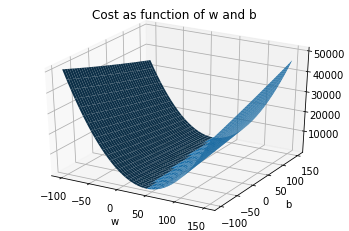

In [3]:

#Assign random start for w and b. Create range of values for these parameters
w_new = np.linspace(-100,150,40) 
b_new = np.linspace(-100,150,40)

y_train = poly_noise
y_pred = 0
m = len(x) #number of training samples

W , B = np.meshgrid(w_new,b_new) #Create Meshgrid of parameters W and B

J = 0
for i in range(m):
  y_pred = W*x[i]+B #Linear model
  J = J + (y_pred - y_train[i])**2
  J = 1/m * J

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
plt.title('Cost as function of w and b')
plt.xlabel('w')
plt.ylabel('b')
ax.plot_surface(W, B, J)



Implementation of gradient descent. Gradient descent is of the form
\begin{equation}
w_n = w_o - \alpha \nabla J(w_o,b) 
\end{equation}

In [5]:
def GradientDescent(a,arr_w,b_poly,epochs,x,y_train):
  n = len(arr_w)
  m = len(x)
  plt.figure()
  plt.title("Data")
  plt.scatter(x,y_train)
  plt.show()
  plt.figure()
  J = 0
  Cost = []
  arr_w_hold = []
  arr_b_hold = []
  for i in range(epochs):
      arr_w_hold.append(arr_w[0]) #lists to hold w and b for plotting purposes 
      arr_b_hold.append(b_poly)

      arr_w_b = np.append(arr_w,b_poly) #updates the coefficients
      y_poly = np.poly1d(arr_w_b) #Create the polynomial
      y_pred_poly = y_poly(x)#Evaluation of polynomial at every x in original dataset

      #Plotting each curve over every epoch
      plt.title('Training Curves')
      plt.plot(x,y_pred_poly, 'g+')
      
      counter = n-1
      loss = (y_train-y_pred_poly)
      J = 1/m * sum(loss**2)
      Cost.append(J) #lists to hold J for plotting purposes
      for j in range(n):
          x_power = x**(j+1)
          loss = (y_train-y_pred_poly)
          mult = loss*x_power 
          dw = (-2/m)*sum(mult) #Calculate derivative w.r.t w for each degree of x
          temp = arr_w[counter]
          z = temp - a*dw #update old w value
          arr_w[counter] = z
          counter-=1
      
      
      db = (-2/m)*sum((y_train-y_pred_poly))
      b_poly =  b_poly - a*db

  #Plotting 
  plt.show()
  overall_pred = np.poly1d(arr_w_b)
  f = overall_pred(x)
  print(overall_pred)
  plt.figure()
  plt.title("Polynomial Approx")
  plt.plot(x,f)
  plt.show()

  plt.figure()
  plt.title('Cost vs Iteration')
  iteration = np.arange(epochs)
  plt.plot(iteration,Cost)


  return arr_w_hold,arr_b_hold,Cost

Enter degree of polynomial to be fitted: 6


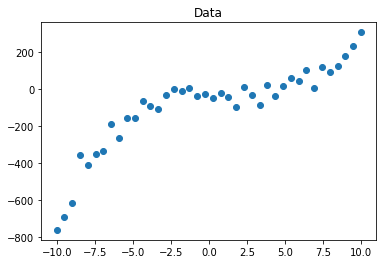

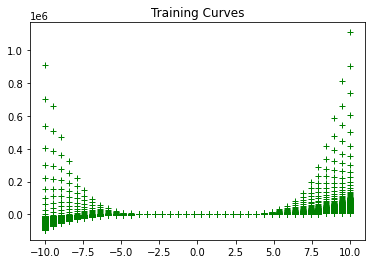

          6           5          4          3          2
-0.01159 x + 0.09368 x + 0.9876 x + 0.9894 x + 0.9998 x + 0.9999 x + 1


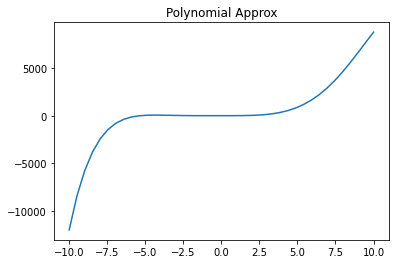

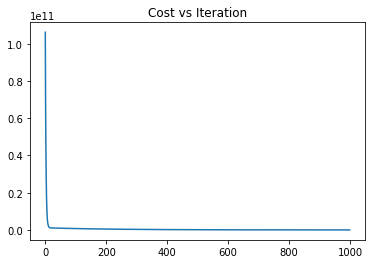

In [6]:
epochs = 1000

#Ask user to input degree of polynomial to be fitted
degree = input("Enter degree of polynomial to be fitted: ")
degree = int(degree)
a =   0.01 ** degree #Hyperparameter extremely important

#Create polynomial coeff as per user request
arr_w = np.ones((degree,), dtype = float) #create vector of 1's to start
b_poly = 1

out = GradientDescent(a,arr_w,b_poly,epochs,x,y_train)


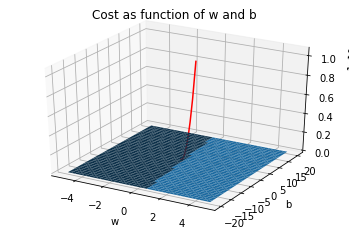

In [7]:
#Works well when training data is linear. Could not figure out how to relate the other w's for higher order polynomials. 
#Could be wrong
W , B = np.meshgrid(np.linspace(-5,5,40),np.linspace(-20,20,40))
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Cost as function of w and b')
plt.xlabel('w')
plt.ylabel('b')
ax.plot3D(out[0], out[1], out[2],'r') 
ax.plot_surface(W, B, J)

Now solving the same problem analytically
\begin{equation}
\hat{\theta} = (X^tX)^{-1}X^tY
\end{equation}

In [8]:
def AnalyticalApproach(x,y_train,degree,ones):
  #Create Y matrix
  Y_mat = np.array([y_train])
  Y_mat = np.transpose(Y_mat)

  #Create X matrix based on degree chosen
  X_mat = np.array([x])
  for i in range(degree):
    power = i+2
    x_power=np.power(x,power)
    arr1 = np.array([x_power])
    X_mat = np.vstack((X_mat,arr1))

  X_mat = np.delete(X_mat,degree,0)
  X_mat_notrans = np.vstack((X_mat,ones))
  X_mat = X_mat_notrans.transpose()

  #Starting Coeff
  arr_w = np.ones((degree,), dtype = float)
  b_poly=1
  arr_w_b = np.append(arr_w,b_poly)
  print('Starting coefficients: ',arr_w_b)

  #Theta hat calculations
  temp = np.matmul(X_mat_notrans , X_mat)
  temp = inv(temp)

  temp2 = np.matmul(X_mat_notrans , Y_mat)
  Theta_hat = np.matmul(temp,temp2)


  #Theta_hat matrix manipulation to get coeff in correct order
  Theta_hat = Theta_hat.transpose()
  Theta_hat = Theta_hat.flatten()
  coeff = Theta_hat.tolist() #convert to 1-d list
  coeff.reverse()
  print('Pred coeff: ',Theta_hat)
  b_new = coeff[0]
  coeff.pop(0)
  coeff.append(b_new)
  y_new = np.poly1d(coeff)
  print( y_new)
  f = y_new(x)

  plt.title("Polynomial Approx")
  plt.plot(x,f)
  plt.show()

Enter degree of polynomial to be fitted: 3
Starting coefficients:  [1. 1. 1. 1.]
Pred coeff:  [  0.58311207  -2.06035062   0.51875605 -18.62887396]
        3        2
0.5188 x - 2.06 x + 0.5831 x - 18.63


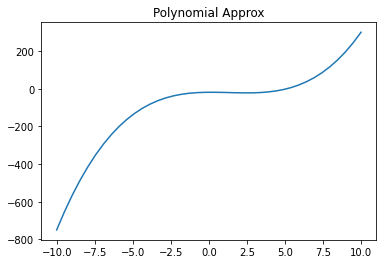

In [9]:
#Analytical Approach
degree = input("Enter degree of polynomial to be fitted: ")
degree = int(degree)

size = len(x)
ones = np.ones(size,dtype = float)

AnalyticalApproach(x,y_train,degree,ones)

**Question 2**

In [10]:
from google.colab import files
import pandas as pd
import io

#Upload the csv file necessary. Make sure to have it downloaded somewhere locally
uploaded = files.upload()

#Convert to pandas dataframe for data extraction
df = pd.read_csv(io.BytesIO(uploaded['heightweight.csv']))
print(df)

Saving heightweight.csv to heightweight.csv
      height     weight   age  male
0    151.765  47.825606  63.0     1
1    139.700  36.485807  63.0     0
2    136.525  31.864838  65.0     0
3    156.845  53.041915  41.0     1
4    145.415  41.276872  51.0     0
..       ...        ...   ...   ...
539  145.415  31.127751  17.0     1
540  162.560  52.163080  31.0     1
541  156.210  54.062496  21.0     0
542   71.120   8.051258   0.0     1
543  158.750  52.531624  68.0     1

[544 rows x 4 columns]


Implementation of linear regression of weight versus height. When plotted, seems to resemble a sort of exponential or quadratic.


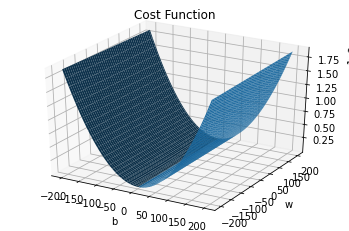

In [11]:
height = df["height"]
weight = df["weight"]
age = df["age"]
sex = df["male"]
height = height.to_numpy()
weight = weight.to_numpy()
age = age.to_numpy()
sex= sex.to_numpy()
#Begin linear regression 
#Assign random start for w and b. Create range of values for these parameters
w_new = np.linspace(-200,200,100) 
b_new = np.linspace(-200,200,100)

y_train = weight
y_pred = 0
m = len(height) #number of training samples

W , B = np.meshgrid(w_new,b_new) #Create Meshgrid of parameters W and B

J = 0
for i in range(m):
  y_pred = W*height[i]+B #Linear model
  J = J + (y_pred - y_train[i])**2
  J = 1/m * J


fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
plt.title('Cost Function')
ax.plot_surface(W, B, J)
plt.ylabel('w')
plt.xlabel('b')

########## Gradient Descent Linear Regression Intialization##########
degree = 1
w = np.ones((degree,), dtype = float)
b = 1
a =   0.00001 ** degree
epochs = 1000


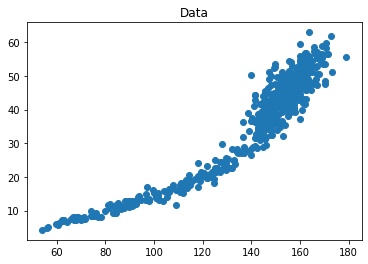

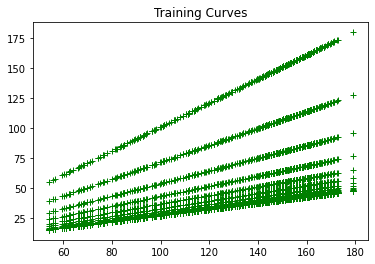

 
0.2602 x + 0.9683


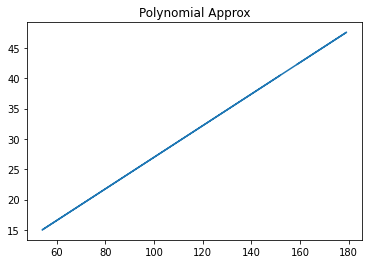

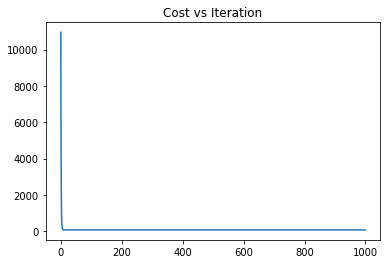

In [12]:
#Weight vs Height
tt = GradientDescent(a,w,b,epochs,height,weight)

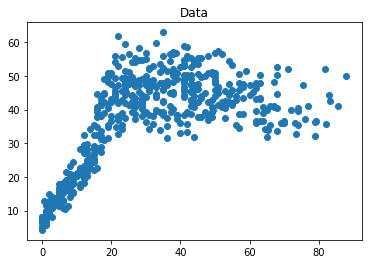

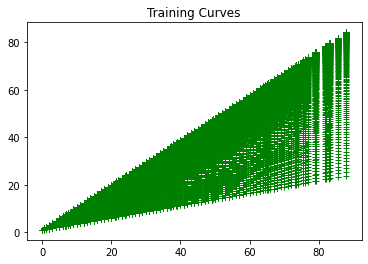

 
0.9437 x + 1.151


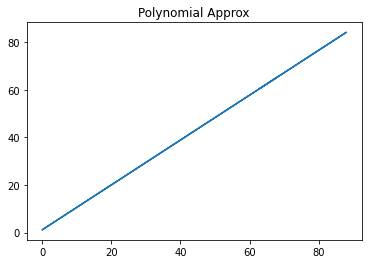

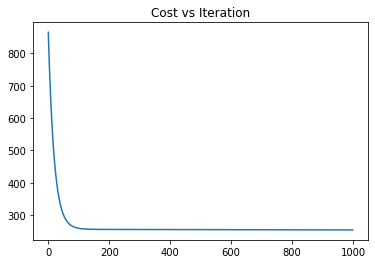

In [13]:
#Weight vs Age
tt = GradientDescent(a,w,b,epochs,age,weight)

Now Analytically

Starting coefficients:  [1. 1.]
Pred coeff:  [  0.50169934 -33.75613691]
 
0.5017 x - 33.76


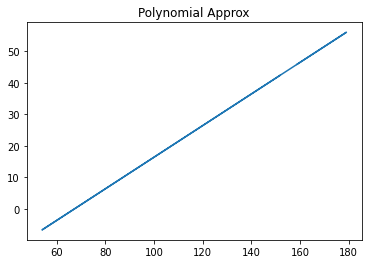

In [ ]:
########## Analytical Linear Regression ##########
size = len(height)
ones = np.ones(size,dtype = float)
degree = 1
#weight versus height
AnalyticalApproach(height,y_train,degree,ones)



Starting coefficients:  [1. 1.]
Pred coeff:  [ 0.48125474 21.48848913]
 
0.4813 x + 21.49


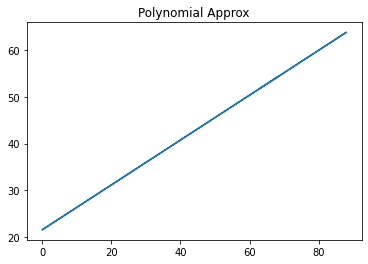

In [ ]:
#Weight versus age 
AnalyticalApproach(age,y_train,degree,ones)

Multivariate linear regression implementation. Implemented using both methods

w1: 0.20530031594382572
w2: 0.22970384611719386
w3 1.000070679039907
b: 0.9782603139411171


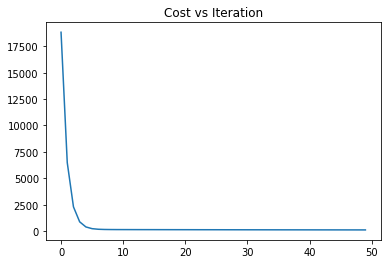

In [ ]:
#Gradient descent
y_output = weight
height = df["height"]
weight = df["weight"]
age = df["age"]
sex = df["male"]
height = height.to_numpy()
weight = weight.to_numpy()
age = age.to_numpy()
sex= sex.to_numpy()

size = len(height)
w1 = 1
w2 = 1
w3 = 1
b = 1
a = 0.00001
J = 0
Cost = []
for i in range(1000):
  y_pred = w1*height+w2*age+w3*sex+b #Linear model
  loss = (y_pred - weight)
  J = 1/size * sum(loss**2)
  Cost.append(J)
  dw1 = 2/size * sum(loss*height)
  dw2 = 2/size * sum(loss*age)
  dw3 = 2/size * sum(loss*sex)
  db = 2/size * sum(loss)

  w1 = w1 - a * dw1
  w2 = w2 - a * dw2
  w3 = w3 - a * dw3
  b = b - a* db


print('w1:',w1)
print('w2:',w2)
print('w3',w3)
print('b:',b)
iteration = np.arange(50)
plt.title("Cost vs Iteration")
plt.plot(iteration,Cost[:50])
plt.show()

#Weight prediction from all 3 variables
height = input("Enter height: ")
sex = input("Enter sex: ")
age = input("Enter age: ")
height = int(height)
sex = int(sex)
age = int(age)
Weight_pred = w1*height+w2*age+w3*sex+b
print('Final prediction: ',Weight_pred)


Now analytically

In [ ]:
#Analytically
y_train = weight
size = len(weight)
b = np.ones(size)
height = df["height"]
weight = df["weight"]
age = df["age"]
sex = df["male"]
X = np.vstack([height])
X = np.vstack((X,age))
X = np.vstack((X, sex))
X_transpose = np.vstack((X,b))
X = np.transpose(X_transpose)
print(X)

temp = np.matmul(X_transpose,X)
temp = inv(temp)

temp2 = np.matmul(X_transpose,y_train)

theta_hat = np.matmul(temp,temp2)
print(theta_hat)

height = input("Enter height: ")
sex = input("Enter sex: ")
age = input("Enter age: ")
height = int(height)
sex = int(sex)
age = int(age)
Weight_pred = theta_hat[0]*height+theta_hat[1]*age+theta_hat[2]*sex+theta_hat[3]

print('w1:',theta_hat[0])
print('w2:',theta_hat[1])
print('w3',theta_hat[2])
print('b:',theta_hat[3])


print('Final prediction: ',Weight_pred)
